In [48]:
# General:
import tweepy           # To consume Twitter's API
import pandas as pd     # To handle data
import numpy as np      # For number computing
from wordcloud import WordCloud,STOPWORDS
# For plotting and visualization:
from IPython.display import display
import matplotlib.pyplot as plt
import seaborn as sns
from os import path
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import os

from wordcloud import WordCloud, STOPWORDS

%matplotlib inline


In [14]:
#Twitter API mots de passe
CONSUMER_KEY = "OjL1upA53Anv5G9b1rPI9hLhl"
CONSUMER_SECRET = "nZZX51768Kte5eBmvXPnk6cS82hghNMJdegFaWC9CQVM1uzHG2"
ACCESS_TOKEN = "1058419050240491521-RR4SCqglA9EscH8NftL4ZlsooX3pvA"
ACCESS_SECRET = "0cnaTDFl9hVV4WFqEdzbH3SABzc9gCw8Yk2oO3JgLNRAT"

In [15]:
# We import our access keys:
from credentials import *    # This will allow us to use the keys as variables

# API's setup:
def twitter_setup():
    """
    Utility function to setup the Twitter's API
    with our access keys provided.
    """
    # Authentication and access using keys:
    auth = tweepy.OAuthHandler(CONSUMER_KEY, CONSUMER_SECRET)
    auth.set_access_token(ACCESS_TOKEN, ACCESS_SECRET)

    # Return API with authentication:
    api = tweepy.API(auth)
    return api


In [16]:
# We create an extractor object:
extractor = twitter_setup()

# We create a tweet list as follows:
tweets = extractor.user_timeline(screen_name="realDonaldTrump", count=200)
print("Number of tweets extracted: {}.\n".format(len(tweets)))

# We print the most recent 5 tweets:
print("5 recent tweets:\n")
for tweet in tweets[:5]:
    print(tweet.text)
    print()


Number of tweets extracted: 200.

5 recent tweets:

No matter what she says, Senator Claire McCaskill will always vote against us and the Great State of Missouri! Vote… https://t.co/vte19xUXWH

If @AndrewGillum did the same job with Florida that he has done in Tallahassee as Mayor, the State will be a crime… https://t.co/4lRrgDmf0z

.@DebbieStabenow voted against Tax Cuts, great Healthcare, Supreme Court Justices and all of the many things the pe… https://t.co/6QxqxzVjrU

Dana Rohrabacher has been a great Congressman for his District and for the people of Cal. He works hard and is resp… https://t.co/QmH6BCmCSA

John James, running as a Republican for the Senate from Michigan, is a spectacular young star of the future. We sho… https://t.co/KjzgRyQVDz



In [17]:
# We create a pandas dataframe as follows:
data = pd.DataFrame(data=[tweet.text for tweet in tweets], columns=['Tweets'])

# We display the first 10 elements of the dataframe:
display(data.head(10))


,Tweets
0,"No matter what she says, Senator Claire McCask..."
1,If @AndrewGillum did the same job with Florida...
2,".@DebbieStabenow voted against Tax Cuts, great..."
3,Dana Rohrabacher has been a great Congressman ...
4,"John James, running as a Republican for the Se..."
5,"In just 2 days, the people of Tennessee are go..."
6,"Thank you for joining us tonight in Tennessee,..."
7,Great to be back in Tennessee. On our way to t...
8,"Thank you Macon, Georgia! Get out on Tuesday, ..."
9,"On my way to Macon, Georgia where the crowds a..."


In [18]:
# Internal methods of a single tweet object:
print(dir(tweets[0]))


['__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_api', '_json', 'author', 'contributors', 'coordinates', 'created_at', 'destroy', 'entities', 'favorite', 'favorite_count', 'favorited', 'geo', 'id', 'id_str', 'in_reply_to_screen_name', 'in_reply_to_status_id', 'in_reply_to_status_id_str', 'in_reply_to_user_id', 'in_reply_to_user_id_str', 'is_quote_status', 'lang', 'parse', 'parse_list', 'place', 'retweet', 'retweet_count', 'retweeted', 'retweets', 'source', 'source_url', 'text', 'truncated', 'user']


In [19]:
# We print info from the first tweet:
print(tweets[0].id)
print(tweets[0].created_at)
print(tweets[0].source)
print(tweets[0].favorite_count)
print(tweets[0].retweet_count)
print(tweets[0].geo)
print(tweets[0].coordinates)
print(tweets[0].entities)


1059439426022137856
2018-11-05 13:36:57
Twitter for iPhone
27875
8320
None
None
{'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [{'url': 'https://t.co/vte19xUXWH', 'expanded_url': 'https://twitter.com/i/web/status/1059439426022137856', 'display_url': 'twitter.com/i/web/status/1…', 'indices': [117, 140]}]}


In [20]:
# We add relevant data:
data['len']  = np.array([len(tweet.text) for tweet in tweets])
data['ID']   = np.array([tweet.id for tweet in tweets])
data['Date'] = np.array([tweet.created_at for tweet in tweets])
data['Source'] = np.array([tweet.source for tweet in tweets])
data['Likes']  = np.array([tweet.favorite_count for tweet in tweets])
data['RTs']    = np.array([tweet.retweet_count for tweet in tweets])


In [21]:
# Display of first 10 elements from dataframe:
display(data.head(10))


,Tweets,len,ID,Date,Source,Likes,RTs
0,"No matter what she says, Senator Claire McCask...",140,1059439426022137856,2018-11-05 13:36:57,Twitter for iPhone,27875,8320
1,If @AndrewGillum did the same job with Florida...,139,1059435440497934337,2018-11-05 13:21:07,Twitter for iPhone,22839,7371
2,".@DebbieStabenow voted against Tax Cuts, great...",140,1059433483423178752,2018-11-05 13:13:20,Twitter for iPhone,22135,7065
3,Dana Rohrabacher has been a great Congressman ...,140,1059317426653933568,2018-11-05 05:32:10,Twitter for iPhone,38126,11041
4,"John James, running as a Republican for the Se...",140,1059310562771984390,2018-11-05 05:04:53,Twitter for iPhone,58217,17444
5,"In just 2 days, the people of Tennessee are go...",140,1059264061030969344,2018-11-05 02:00:06,Twitter for iPhone,38101,11156
6,"Thank you for joining us tonight in Tennessee,...",110,1059258034474704897,2018-11-05 01:36:10,Twitter for iPhone,67533,19277
7,Great to be back in Tennessee. On our way to t...,140,1059230569257680896,2018-11-04 23:47:01,Twitter for iPhone,45323,11289
8,"Thank you Macon, Georgia! Get out on Tuesday, ...",140,1059220177169063941,2018-11-04 23:05:44,Twitter for iPhone,42141,11554
9,"On my way to Macon, Georgia where the crowds a...",139,1059174162965716992,2018-11-04 20:02:53,Twitter for iPhone,45721,12548


In [22]:
# We extract the mean of lenghts:
mean = np.mean(data['len'])

print("The lenght's average in tweets: {}".format(mean))


The lenght's average in tweets: 123.815


In [23]:
# We extract the tweet with more FAVs and more RTs:

fav_max = np.max(data['Likes'])
rt_max  = np.max(data['RTs'])

fav = data[data.Likes == fav_max].index[0]
rt  = data[data.RTs == rt_max].index[0]

# Max FAVs:
print("The tweet with more likes is: \n{}".format(data['Tweets'][fav]))
print("Number of likes: {}".format(fav_max))
print("{} characters.\n".format(data['len'][fav]))

# Max RTs:
print("The tweet with more retweets is: \n{}".format(data['Tweets'][rt]))
print("Number of retweets: {}".format(rt_max))
print("{} characters.\n".format(data['len'][rt]))


The tweet with more likes is: 
Had a very good conversation with the newly elected President of Brazil, Jair Bolsonaro, who won his race by a subs… https://t.co/zq4N2zvF65
Number of likes: 342377
140 characters.

The tweet with more retweets is: 
Had a very good conversation with the newly elected President of Brazil, Jair Bolsonaro, who won his race by a subs… https://t.co/zq4N2zvF65
Number of retweets: 93931
140 characters.



In [24]:
# We create time series for data:

tlen = pd.Series(data=data['len'].values, index=data['Date'])
tfav = pd.Series(data=data['Likes'].values, index=data['Date'])
tret = pd.Series(data=data['RTs'].values, index=data['Date'])


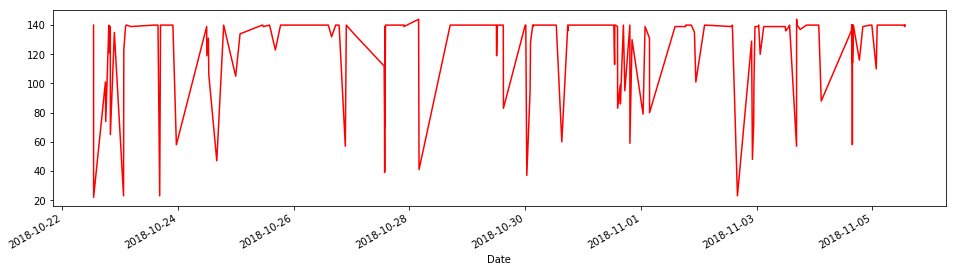

In [25]:
# Lenghts along time:
tlen.plot(figsize=(16,4), color='r');


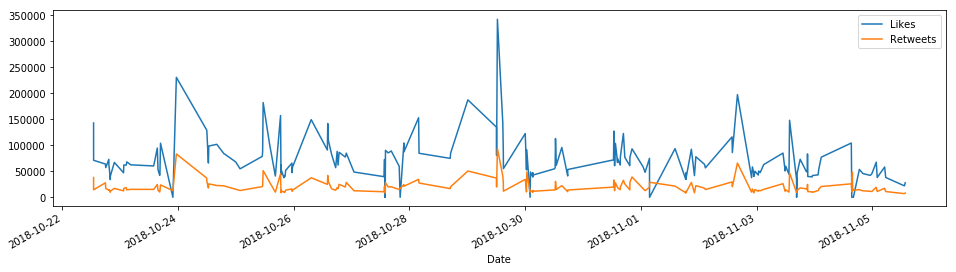

In [26]:
# Likes vs retweets visualization:
tfav.plot(figsize=(16,4), label="Likes", legend=True)
tret.plot(figsize=(16,4), label="Retweets", legend=True);


In [27]:
# We obtain all possible sources:
sources = []
for source in data['Source']:
    if source not in sources:
        sources.append(source)

# We print sources list:
print("Creation of content sources:")
for source in sources:
    print("* {}".format(source))


Creation of content sources:
* Twitter for iPhone
* Media Studio


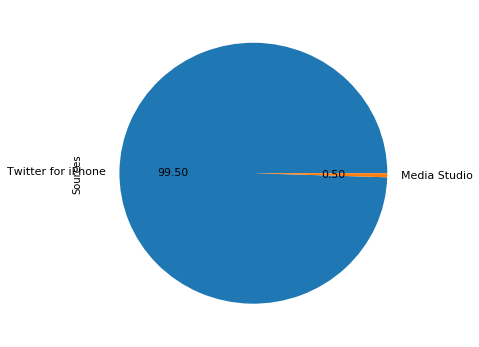

In [28]:
# We create a numpy vector mapped to labels:
percent = np.zeros(len(sources))

for source in data['Source']:
    for index in range(len(sources)):
        if source == sources[index]:
            percent[index] += 1
            pass

percent /= 100

# Pie chart:
pie_chart = pd.Series(percent, index=sources, name='Sources')
pie_chart.plot.pie(fontsize=11, autopct='%.2f', figsize=(6, 6));


In [29]:
sources


['Twitter for iPhone', 'Media Studio']

In [30]:
from textblob import TextBlob
import re

def clean_tweet(tweet):
    '''
    Utility function to clean the text in a tweet by removing 
    links and special characters using regex.
    '''
    return ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)", " ", tweet).split())

def analize_sentiment(tweet):
    '''
    Utility function to classify the polarity of a tweet
    using textblob.
    '''
    analysis = TextBlob(clean_tweet(tweet))
    if analysis.sentiment.polarity > 0:
        return 1
    elif analysis.sentiment.polarity == 0:
        return 0
    else:
        return -1


In [31]:
# We create a column with the result of the analysis:
data['SA'] = np.array([ analize_sentiment(tweet) for tweet in data['Tweets'] ])

# We display the updated dataframe with the new column:
display(data.head(10))


,Tweets,len,ID,Date,Source,Likes,RTs,SA
0,"No matter what she says, Senator Claire McCask...",140,1059439426022137856,2018-11-05 13:36:57,Twitter for iPhone,27875,8320,1
1,If @AndrewGillum did the same job with Florida...,139,1059435440497934337,2018-11-05 13:21:07,Twitter for iPhone,22839,7371,0
2,".@DebbieStabenow voted against Tax Cuts, great...",140,1059433483423178752,2018-11-05 13:13:20,Twitter for iPhone,22135,7065,1
3,Dana Rohrabacher has been a great Congressman ...,140,1059317426653933568,2018-11-05 05:32:10,Twitter for iPhone,38126,11041,1
4,"John James, running as a Republican for the Se...",140,1059310562771984390,2018-11-05 05:04:53,Twitter for iPhone,58217,17444,1
5,"In just 2 days, the people of Tennessee are go...",140,1059264061030969344,2018-11-05 02:00:06,Twitter for iPhone,38101,11156,1
6,"Thank you for joining us tonight in Tennessee,...",110,1059258034474704897,2018-11-05 01:36:10,Twitter for iPhone,67533,19277,0
7,Great to be back in Tennessee. On our way to t...,140,1059230569257680896,2018-11-04 23:47:01,Twitter for iPhone,45323,11289,1
8,"Thank you Macon, Georgia! Get out on Tuesday, ...",140,1059220177169063941,2018-11-04 23:05:44,Twitter for iPhone,42141,11554,0
9,"On my way to Macon, Georgia where the crowds a...",139,1059174162965716992,2018-11-04 20:02:53,Twitter for iPhone,45721,12548,0


In [32]:
# We construct lists with classified tweets:

pos_tweets = [ tweet for index, tweet in enumerate(data['Tweets']) if data['SA'][index] > 0]
neu_tweets = [ tweet for index, tweet in enumerate(data['Tweets']) if data['SA'][index] == 0]
neg_tweets = [ tweet for index, tweet in enumerate(data['Tweets']) if data['SA'][index] < 0]


In [33]:
# We print percentages:

print("Percentage of positive tweets: {}%".format(len(pos_tweets)*100/len(data['Tweets'])))
print("Percentage of neutral tweets: {}%".format(len(neu_tweets)*100/len(data['Tweets'])))
print("Percentage de negative tweets: {}%".format(len(neg_tweets)*100/len(data['Tweets'])))


Percentage of positive tweets: 52.5%
Percentage of neutral tweets: 27.5%
Percentage de negative tweets: 20.0%


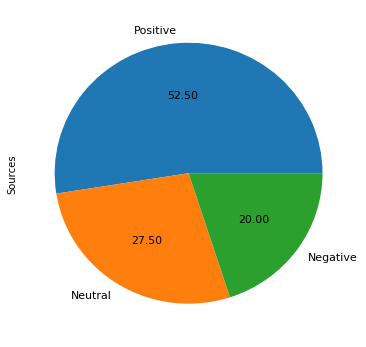

In [34]:

percentpie=[len(pos_tweets)*100/len(data['Tweets']),len(neu_tweets)*100/len(data['Tweets']),len(neg_tweets)*100/len(data['Tweets'])]
sourcespie=['Positive','Neutral','Negative']
# Pie chart:
pie_chart = pd.Series(percentpie, index=sourcespie, name='Sources')
pie_chart.plot.pie(fontsize=11, autopct='%.2f', figsize=(6, 6));

Positive words


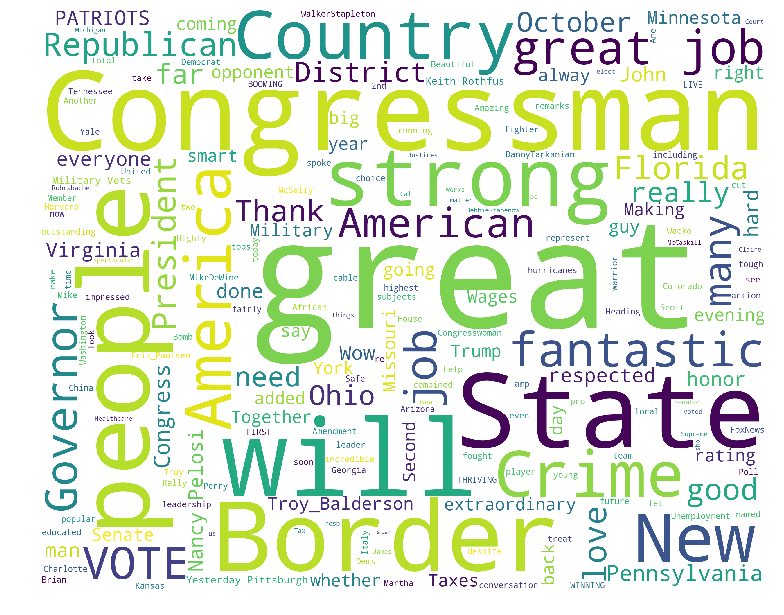

Negative words


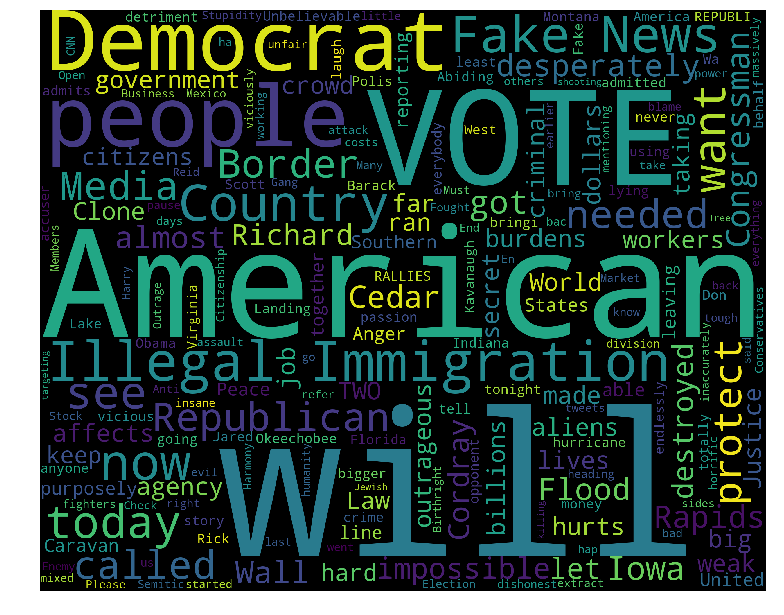

In [43]:
train_pos = data[ data['SA'] == 1]
train_pos = train_pos['Tweets']
train_neg = data[ data['SA'] == -1]
train_neg = train_neg['Tweets']

def wordcloud_draw(data, color = 'black'):
    words = ' '.join(data)
    cleaned_word = " ".join([word for word in words.split()
                            if 'http' not in word
                                and not word.startswith('@')
                                and not word.startswith('#')
                                and word != 'RT'
                            ])
    wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color=color,
                      width=2500,
                      height=2000
                     ).generate(cleaned_word)
    plt.figure(1,figsize=(13, 13))
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show()
    
print("Positive words")
wordcloud_draw(train_pos,'white')
print("Negative words")
wordcloud_draw(train_neg)

In [69]:
def wordcloud_clean(data):
    words = ' '.join(data)
    cleaned_word = " ".join([word for word in words.split()
                            if 'http' not in word
                                and not word.startswith('@')
                                and not word.startswith('#')
                                and word != 'RT'
                            ])
    return cleaned_word

In [73]:
pos=wordcloud_clean(train_pos)
neg=wordcloud_clean(train_neg)

'Congressman of Iowa got a desperately needed Flood Wall for Cedar Rapids that was almost impossible to get. H… ....Richard Cordray will let you down, just like he did when he destroyed the government agency that he ran. Clone of… It is outrageous what the Democrats are doing to our Country. Vote Republican now! Illegal immigration affects the lives of all Americans. Illegal Immigration hurts American workers, burdens American t… Unbelievable crowd in Florida tonight. Get out and VOTE! If you want to protect criminal aliens – VOTE DEMOCRAT. If you want to protect Law-Abiding Americans – VOTE REPUBLI… ....Lake Okeechobee and all of the hurricane money were a passion for Rick Scott, who called endlessly on behalf of… Landing in Montana now - at least everybody admits that my lines and crowds are far bigger than Barack Obama’s... A vicious accuser of Justice Kavanaugh has just admitted that she was lying, her story was totally made up, or FAKE… Will be going to West Virginia and Indiana t

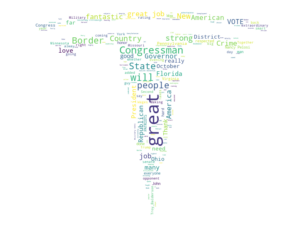

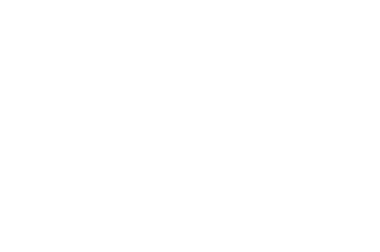

In [136]:
#!/usr/bin/env python
"""
Masked wordcloud
================
Using a mask you can generate wordclouds in arbitrary shapes.
"""

from os import path
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import os

from wordcloud import WordCloud, STOPWORDS

# get data directory (using getcwd() is needed to support running example in generated IPython notebook)
d = path.dirname(__file__) if "__file__" in locals() else os.getcwd()

# Read the whole text.
text = open(path.join(d, 'alice.txt')).read()

# read the mask image
# taken from
# http://www.stencilry.org/stencils/movies/alice%20in%20wonderland/255fk.jpg
alice_mask = np.array(Image.open(path.join(d, "TESLA901Icon-01.jpg")))

stopwords = set(STOPWORDS)
stopwords.add("said")

wc = WordCloud(background_color="white", max_words=2000, mask=alice_mask,
               stopwords=stopwords, contour_width=0, contour_color='steelblue')

# generate word cloud
wc.generate(pos)

# store to file
wc.to_file(path.join(d, "Postive.png"))

# show
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.figure()
#plt.imshow(alice_mask, cmap=plt.cm.gray, interpolation='bilinear')
plt.axis("off")
plt.show()

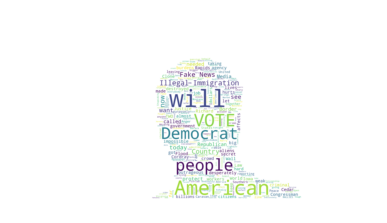

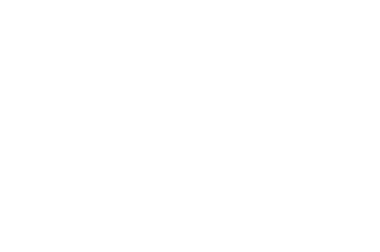

In [144]:
#!/usr/bin/env python
"""
Masked wordcloud
================
Using a mask you can generate wordclouds in arbitrary shapes.
"""

from os import path
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import os

from wordcloud import WordCloud, STOPWORDS

# get data directory (using getcwd() is needed to support running example in generated IPython notebook)
d = path.dirname(__file__) if "__file__" in locals() else os.getcwd()

# Read the whole text.
text = open(path.join(d, 'alice.txt')).read()

# read the mask image
# taken from
# http://www.stencilry.org/stencils/movies/alice%20in%20wonderland/255fk.jpg
alice_mask = np.array(Image.open(path.join(d, "1 Ph_HqvW6Bk4vb9JCPkjdtQ.jpeg")))

stopwords = set(STOPWORDS)
stopwords.add("said")

wc = WordCloud(background_color="white", max_words=2000, mask=alice_mask,
               stopwords=stopwords, contour_width=0, contour_color='steelblue')

# generate word cloud
wc.generate(neg)

# store to file
wc.to_file(path.join(d, "Negative.png"))

# show
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.figure()
#plt.imshow(alice_mask, cmap=plt.cm.gray, interpolation='bilinear')
plt.axis("off")
plt.show()